In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv(r"/workspaces/Startups_multiples/multiples/multiples_combined.csv")


In [2]:
dataset.describe()

,Number of Founders,Number of Funding Rounds,Last Funding Amount (in USD),Last Equity Funding Amount (in USD),Total Equity Funding Amount (in USD),Total Funding Amount (in USD),Number of Investors
count,6558.000000,7689.000000,6.797000e+03,5.668000e+03,6.149000e+03,7.510000e+03,6629.000000
mean,2.124276,3.947067,1.270035e+08,1.341469e+08,2.942078e+08,3.440166e+08,10.148891
std,1.232083,3.777904,5.334813e+08,6.515606e+08,1.252377e+09,1.591732e+09,10.685568
min,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
25%,1.000000,1.000000,2.000000e+06,2.940982e+06,4.500000e+06,3.670000e+06,2.000000
50%,2.000000,3.000000,1.464996e+07,1.991142e+07,4.000000e+07,3.105000e+07,7.000000
75%,3.000000,6.000000,7.700000e+07,8.500000e+07,1.911000e+08,1.990000e+08,15.000000
max,12.000000,38.000000,1.427552e+10,1.427552e+10,2.409053e+10,2.850000e+10,99.000000


In [3]:
dataset = dataset[dataset["Operating Status"] != "Closed"]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9706 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Organization Name                     9706 non-null   object 
 1   Organization Name URL                 9706 non-null   object 
 2   Growth Category                       4256 non-null   object 
 3   IPO Status                            9706 non-null   object 
 4   Company Type                          9449 non-null   object 
 5   Number of Employees                   9197 non-null   object 
 6   Acquisition Status                    2263 non-null   object 
 7   Last Funding Type                     7475 non-null   object 
 8   Last Funding Date                     7475 non-null   object 
 9   Investor Type                         513 non-null    object 
 10  Founded Date                          9170 non-null   object 
 11  Founded Date Precision

In [52]:
dataset["Last Equity Funding Amount (in USD)"] = dataset["Last Equity Funding Amount (in USD)"].fillna(0)
dataset["Last Funding Amount (in USD)"] = dataset["Last Funding Amount (in USD)"].fillna(0)
dataset["Total Funding Amount (in USD)"] = dataset["Total Funding Amount (in USD)"].fillna(0)

dataset["Total Equity Funding Amount (in USD)"] = dataset["Total Equity Funding Amount (in USD)"].fillna(0)
dataset["Company Type"] = dataset["Company Type"].fillna("For Profit")

In [53]:
columns_todrop = [
    "Growth Confidence",
    "Actively Hiring",
    "Investment Stage",
    "Funding Status",
    "Most Recent Valuation Range",
    "Number of Investments",
    "Last Funding Amount Currency",
    "Investor Type",
    "Acquisition Status",
    "Growth Category",
    "Organization Name URL"
]
dataset = dataset.drop(columns=columns_todrop)

In [54]:
dataset = dataset.dropna(subset=["Number of Founders"])
dataset = dataset.dropna(subset=["Top 5 Investors"])
dataset = dataset.dropna(subset=["Number of Investors"])
dataset = dataset.dropna(subset=["Headquarters Regions"])
dataset = dataset.dropna(subset=["Number of Employees"])
dataset = dataset.dropna(subset=["Industry Groups"])
dataset = dataset.dropna(subset=["Founded Date"])
dataset = dataset.dropna(subset=["Last Funding Date"])
dataset = dataset.dropna(subset=["Last Funding Type"])

In [55]:
dataset.isna().sum()

Organization Name                       0
IPO Status                              0
Company Type                            0
Number of Employees                     0
Last Funding Type                       0
Last Funding Date                       0
Founded Date                            0
Founded Date Precision                  0
Operating Status                        0
Number of Founders                      0
Number of Funding Rounds                0
Last Funding Amount (in USD)            0
Last Equity Funding Amount (in USD)     0
Total Equity Funding Amount (in USD)    0
Total Funding Amount (in USD)           0
Top 5 Investors                         0
Number of Investors                     0
Headquarters Regions                    0
Industry Groups                         0
Industries                              0
Headquarters Location                   0
dtype: int64

In [56]:
dataset.to_excel(r"/workspaces/Startups_multiples/dataset1/final_data(09-09).xlsx", index=False)
dataset.to_csv(r"/workspaces/Startups_multiples/dataset1/final_data(09-09).csv", index=False)

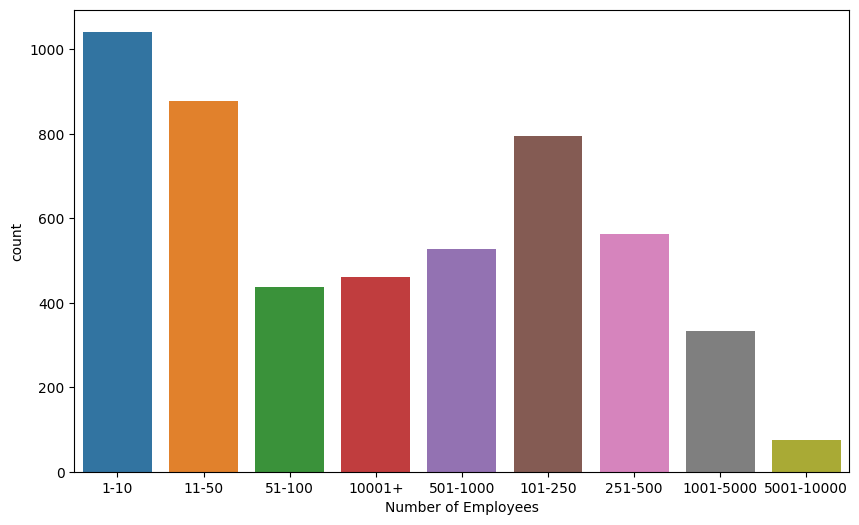

In [58]:

plt.figure(figsize=(10, 6))
sns.countplot(x="Number of Employees", data=dataset)
plt.show()

In [59]:
dataset.isna().sum()

Organization Name                       0
IPO Status                              0
Company Type                            0
Number of Employees                     0
Last Funding Type                       0
Last Funding Date                       0
Founded Date                            0
Founded Date Precision                  0
Operating Status                        0
Number of Founders                      0
Number of Funding Rounds                0
Last Funding Amount (in USD)            0
Last Equity Funding Amount (in USD)     0
Total Equity Funding Amount (in USD)    0
Total Funding Amount (in USD)           0
Top 5 Investors                         0
Number of Investors                     0
Headquarters Regions                    0
Industry Groups                         0
Industries                              0
Headquarters Location                   0
dtype: int64

## Dealing with Industries
This section involved sector mapping and the final sectors used are those of Damodaran. This has been done simply becasue it makes the whole process of merging and analysis easier and with a more precise comparison.
#### IMPORTANT: the first run of the file was done on a sample of 1000 startups, and as the number will grow also the industries in the dictionary should be updated.

The logic of this section is relatively simple: each startup listed on Crunchbase is given from 3 to 5 industries in which their product can be applied. For example: Startup XYZ, in Industries:  "Artificial Intelligence (AI), Electronics, Machine Learning, Semiconductor" . The code consider three approaches to determine the main industry:
- Most Specific Industry: Sometimes, the most specific or niche term is considered the main industry (e.g., "Semiconductor" here).

- First Mentioned: The first term listed is often regarded as the primary industry (e.g., "Artificial Intelligence (AI)").

- Frequency of Mention: If you have multiple entries like this, industries that appear more frequently across the dataset can be considered more important.



In [60]:
dataset = pd.DataFrame(dataset)
dataset['Industries'] = dataset['Industries'].astype(str)

In [61]:
def extract_main_industry(industries):
    # Split industries by commas and return the first one
    return industries.split(',')[0].strip()
dataset['Main Industry'] = dataset['Industries'].apply(extract_main_industry)


In [62]:
print(dataset[['Organization Name', 'Main Industry']])
dataset['Main Industry'].unique()

     Organization Name                 Main Industry
0             The VERT                  Architecture
3             NovoGrid                       Battery
5           Metaschool                    E-Learning
7          Ignota Labs  Artificial Intelligence (AI)
10       Coffee Circle                           B2B
...                ...                           ...
9949         WFrontier                      Shopping
9950          [24]7.ai              Customer Service
9954          wowworks               Human Resources
9970         Boolv.com      Environmental Consulting
9992             Apiax                    Compliance

[5112 rows x 2 columns]


array(['Architecture', 'Battery', 'E-Learning',
       'Artificial Intelligence (AI)', 'B2B', 'Health Care',
       'Biotechnology', 'Recycling', 'Advertising', 'Analytics',
       'Big Data', 'Apps', 'Animal Feed', 'File Sharing', 'Manufacturing',
       'Cloud Computing', 'E-Commerce', 'Agriculture',
       'Information Services', 'IT Management', 'Education', 'Content',
       'EdTech', 'Building Maintenance', 'Blockchain', 'Mobile Apps',
       'Consumer Applications', 'Call Center', 'Finance',
       'Information Technology', 'Consulting', 'Journalism',
       'Enterprise Software', 'Hardware', 'Internet', 'eSports',
       'Shopping Mall', 'Charging Infrastructure', 'Financial Services',
       'FinTech', 'Hospitality', 'Android', 'Brand Marketing',
       'Food Processing', 'Auctions', 'Environmental Engineering',
       'Digital Media', 'Fashion', 'Consumer Goods', 'Personal Health',
       'E-Commerce Platforms', 'Predictive Analytics', 'Software',
       'Recruiting', 'Custom

In [63]:
industry_mapping_reversed = {
    "Aerospace/Defense": ["Aerospace", "Classifieds", "Government", "GovTech"],
    "Air Transport": ["Air Transportation", "Drones"],
    "Apparel": ["Apparel", "Fashion"],
    "Auto & Truck": ["Automotive", "Electric Vehicle"],
    "Auto Parts": ["Battery"],
    "Bank (Money Center)": ["Banking", "Bitcoin"],
    "Banks (Regional)": ["Commercial Lending", "Consumer Lending", "Lending"],
    "Beverage (Alcoholic)": [],
    "Beverage (Soft)": ["Coffee"],
    "Broadcasting": [],
    "Brokerage & Investment Banking": ["Angel Investment", "Crowdfunding", "Crowdsourcing"],
    "Building Materials": ["Building Material", "Construction", "Architecture"],
    "Business & Consumer Services": ["Consulting", "Professional Services", "Leasing", "B2B", "Business Development", "Enterprise Resource Planning (ERP)", "B2C", "Business Travel",
                                     "CRM", "Event Management", "Business Process Automation (BPA)", "Bookkeeping and Payroll", "Employment", "Billing", "Enterprise Software",
                                     "Technical Support", "Enterprise Applications", "Lead Generation", "Productivity Tools", "Sales Automation", "Accounting", "Commercial",
                                     "Service Industry"],
    "Cable TV": [],
    "Chemical (Basic)": ["Chemical"],
    "Chemical (Diversified)": ["Chemical Engineering"],
    "Chemical (Specialty)": ["Advanced Materials"],
    "Coal & Related Energy": ["Nuclear"],
    "Computer Services": ["Information Technology", "Cloud Computing", "Cloud Data Services", "Cloud Management", "Cloud Infrastructure", "Data Center", "SaaS", "Graphic Design"],
    "Computers/Peripherals": ["Computer", "Hardware", "Robotics"],
    "Construction Supplies": [],
    "Diversified": ["Consumer Goods", "Consumer Applications", "Consumer Software", "Consumer"],
    "Drugs (Biotechnology)": ["Biotechnology", "Biopharma", "Alternative Medicine"],
    "Drugs (Pharmaceutical)": ["Health Care", "Emergency Medicine", "Addiction Treatment", "Dental", "Beauty"],
    "Education": ["EdTech", "Corporate Training", "E-Learning", "Education"],
    "Electrical Equipment": ["Electrical Distribution"],
    "Electronics (Consumer & Office)": ["Consumer Electronics"],
    "Electronics (General)": ["Electronics", "Embedded Systems", "Embedded Software"],
    "Engineering/Construction": ["Industrial Engineering", "Civil Engineering", "Industrial Automation"],
    "Entertainment": ["Gaming", "Digital Entertainment", "Content", "Fantasy Sports", "eSports", "Communities"],
    "Environmental & Waste Services": ["CleanTech", "Recycling", "Environmental Consulting"],
    "Farming/Agriculture": ["Agriculture", "AgTech", "Dairy", "Animal Feed", "Pet"],
    "Financial Svcs. (Non-bank & Insurance)": ["FinTech", "Insurance", "Auto Insurance", "Health Insurance", "Credit Bureau", "Fraud Detection", "Compliance", "Advice", 
                                               "Decentralized Finance (DeFi)", "Cryptocurrency", "Finance"],
    "Food Processing": ["Alternative Protein", "Dietary Supplements", "Cooking", "Bakery"],
    "Food Wholesalers": ["Food and Beverage"],
    "Furn/Home Furnishings": [],
    "Green & Renewable Energy": ["GreenTech", "Clean Energy", "Energy Efficiency", "Carbon Capture"],
    "Healthcare Products": ["Health Care", "Alternative Medicine"],
    "Healthcare Support Services": ["Assisted Living", "Clinical Trials", "Baby", "Child Care", "Fitness", "Sports"],
    "Heathcare Information and Technology": ["Biometrics", "Human Resources", "Employee Benefits"],
    "Homebuilding": ["Property Development", "Real Estate (Development)"],
    "Hospitals/Healthcare Facilities": ["Hospitals/Healthcare Facilities", "Dental"],
    "Hotel/Gaming": ["Hospitality", "Adventure Travel", "Events"],
    "Household Products": ["Home Services"],
    "Information Services": ["Business Information Systems", "Information Services", "Analytics", "Big Data", "Market Research", "Business Intelligence", "Database"],
    "Insurance (General)": ["Insurance", "Credit", "Legal"],
    "Insurance (Life)": [],
    "Insurance (Prop/Cas.)": ["Insurance", "Auto Insurance"],
    "Investments & Asset Management": ["Asset Management", "Investments & Asset Management", "Credit Cards", "Financial Services", "PropTech"],
    "Machinery": ["Manufacturing", "3D Printing", "Industrial Manufacturing", "3D Technology"],
    "Metals & Mining": [],
    "Office Equipment & Services": [],
    "Oil/Gas (Integrated)": [],
    "Oil/Gas (Production and Exploration)": [],
    "Oil/Gas Distribution": [],
    "Oilfield Svcs/Equip.": [],
    "Packaging & Container": [],
    "Paper/Forest Products": [],
    "Power": ["Energy"],
    "Precious Metals": ["Advanced Materials"],
    "Publishing & Newspapers": ["Blogging Platforms", "Copywriting"],
    "R.E.I.T.": ["Real Estate (REITs)"],
    "Real Estate (Development)": ["Real Estate (Development)", "Property Development", ],
    "Real Estate (General/Diversified)": ["Commercial Real Estate"],
    "Real Estate (Operations & Services)": ["Property Management", "Real Estate (Operations & Services)"],
    "Recreation": ["Recreation", "Adventure Travel"],
    "Reinsurance": [],
    "Restaurant/Dining": ["Restaurants", "Food Delivery"],
    "Retail (Automotive)": ["Retail"],
    "Retail (Building Supply)": [],
    "Retail (Distributors)": ["Retail (General)", "Retail"],
    "Retail (General)": ["Retail", "E-Commerce Platforms", "E-Commerce", "Subscription Service"],
    "Retail (Grocery and Food)": ["Food and Beverage"],
    "Retail (REITs)": [],
    "Retail (Special Lines)": ["Fashion"],
    "Rubber & Tires": [],
    "Semiconductor": ["Semiconductor"],
    "Semiconductor Equip": ["Semiconductor Equip"],
    "Shipbuilding & Marine": [],
    "Shoe": [],
    "Software (Entertainment)": ["Ad Server", "Augmented Reality"],
    "Software (Internet)": ["Cloud Security", "Developer APIs", "Cloud Computing", "Software", "SaaS", "Mobile Apps", "PropTech", "Cloud Security"],
    "Software (System & Application)": ["Generative AI", "Artificial Intelligence (AI)", "Developer Platform", "Blockchain", "Machine Learning", "Apps", "CMS", "Data Storage",
                                        "Cloud Storage", "Internet of Things", "Internet of Things (IoT)"],
    "Steel": [],
    "Telecom (Wireless)": [],
    "Telecom. Equipment": ["Cyber Security", "Network Security", "Telecommunications", "Fleet Management", "GPS"],
    "Telecom. Services": ["Messaging", "Internet", "Telecommunications", "Satellite Communication", "Advertising", "Collaboration", "Content Delivery Network", 
                          "Communications Infrastructure", "Digital Marketing", "Ad Exchange", "Digital Media"],
    "Tobacco": [],
    "Transportation": ["Freight Service", "Delivery", "Logistics", "Delivery Service"],
    "Transportation (Railroads)": ["Infrastructure"],
    "Trucking": [],
    "Utility (General)": [],
    "Utility (Water)": [],
}

In [64]:
def allocate_sector(main_sector, industry_mapping_reversed):
    if main_sector == 'Aerospace':
        return 'Aerospace/Defense'
    
    for sector, industries in industry_mapping_reversed.items():
        if main_sector in industries:
            return sector
    return None

dataset['Industry Name'] = dataset['Main Industry'].apply(lambda x: allocate_sector(x, industry_mapping_reversed))


In [65]:
dataset = dataset.dropna(subset=['Industry Name'])
dataset['Industry Name'].isna().sum()

0

# Feature engineering

these are the features, when handles put in a "-" list:
       'Investor Type', 'Founded Date',
       'Founded Date Precision', 'Operating Status', 'Actively Hiring',
       'Investment Stage', 'Number of Founders', 'Number of Funding Rounds',
       'Funding Status', 'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount',
       'Last Equity Funding Amount Currency',
       'Last Equity Funding Amount (in USD)', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Equity Funding Amount Currency',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount',
       'Total Funding Amount Currency', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors'

To be dropped: Organization Name, Description

Handeled: 
- Growth Category
- IPO Status
- Company Type
- Number of Employees
- Acquisition Status
- Last Funding Type
- Last Funding Date
- Industries
- Headquarters Location
- CB Ranking (Company)

In [66]:
dataset.columns

Index(['Organization Name', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Founded Date', 'Founded Date Precision', 'Operating Status',
       'Number of Founders', 'Number of Funding Rounds',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount (in USD)',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors', 'Headquarters Regions',
       'Industry Groups', 'Industries', 'Headquarters Location',
       'Main Industry', 'Industry Name'],
      dtype='object')

In [67]:
dataset["IPO Status"].unique()
# dataset["Growth Category"].unique()

ipo_dummies = pd.get_dummies(dataset["IPO Status"], prefix="Status_")
dataset = pd.concat([dataset, ipo_dummies], axis=1)

#growth_dummies = pd.get_dummies(dataset["Growth Category"], prefix="GrowthCategory_")
#dataset = pd.concat([dataset, growth_dummies], axis=1)
#dataset.head()


In [68]:
# Group variables starting with Status_ and GrowthCategory_ for being used later in randomforest
status_columns = [col for col in dataset.columns if col.startswith("Status_")]
#growth_columns = [col for col in dataset.columns if col.startswith("GrowthCategory_")]
company = status_columns #+ growth_columns
status_columns#, growth_columns


['Status__Private']

In [69]:
dataset["Company Type"].unique()
dataset["Company Type"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4675 entries, 0 to 9992
Series name: Company Type
Non-Null Count  Dtype 
--------------  ----- 
4675 non-null   object
dtypes: object(1)
memory usage: 73.0+ KB


In [70]:
company_type_dummies = pd.get_dummies(dataset["Company Type"], prefix="CompanyType_")
dataset = pd.concat([dataset, company_type_dummies], axis=1)
dataset.head()

,Organization Name,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Founded Date,Founded Date Precision,Operating Status,Number of Founders,...,Number of Investors,Headquarters Regions,Industry Groups,Industries,Headquarters Location,Main Industry,Industry Name,Status__Private,CompanyType__For Profit,CompanyType__Non-profit
0,The VERT,Private,For Profit,1-10,Pre-Seed,2024-09-01,2021-01-01,year,Active,1.0,...,1.0,"Europe, Middle East, and Africa (EMEA)","Information Technology, Real Estate, Software,...","Architecture, Carbon Capture, Construction, Gr...","London, England, United Kingdom",Architecture,Building Materials,1,1,0
3,NovoGrid,Private,For Profit,1-10,Convertible Note,2019-12-31,2014-09-15,day,Active,3.0,...,3.0,"European Union (EU), Europe, Middle East, and ...","Energy, Financial Services, Lending and Invest...","Battery, Clean Energy, Electric Vehicle, Elect...","Dublin, Dublin, Ireland",Battery,Auto Parts,1,1,0
5,Metaschool,Private,For Profit,11-50,Seed,2022-09-23,2022-01-01,year,Active,1.0,...,3.0,"Asia-Pacific (APAC), Association of Southeast ...","Blockchain and Cryptocurrency, Education, Inte...","E-Learning, Web3","Singapore, Central Region, Singapore",E-Learning,Education,1,1,0
7,Ignota Labs,Private,For Profit,1-10,Pre-Seed,2022-10-11,2021-01-01,year,Active,2.0,...,2.0,"Europe, Middle East, and Africa (EMEA)","Artificial Intelligence (AI), Biotechnology, D...","Artificial Intelligence (AI), Biotechnology, H...","London, England, United Kingdom",Artificial Intelligence (AI),Software (System & Application),1,1,0
10,Coffee Circle,Private,For Profit,51-100,Series B,2023-06-26,2010-01-01,year,Active,1.0,...,3.0,"European Union (EU), Europe, Middle East, and ...","Commerce and Shopping, Food and Beverage, Othe...","B2B, B2C, Coffee, E-Commerce, Food and Beverag...","Berlin, Berlin, Germany",B2B,Business & Consumer Services,1,1,0


,Organization Name,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Founded Date,Founded Date Precision,Operating Status,Number of Founders,...,CompanyType__Non-profit,NumberEmployees__1-10,NumberEmployees__10001+,NumberEmployees__1001-5000,NumberEmployees__101-250,NumberEmployees__11-50,NumberEmployees__251-500,NumberEmployees__5001-10000,NumberEmployees__501-1000,NumberEmployees__51-100
0,The VERT,Private,For Profit,1-10,Pre-Seed,2024-09-01,2021-01-01,year,Active,1.0,...,0,1,0,0,0,0,0,0,0,0
3,NovoGrid,Private,For Profit,1-10,Convertible Note,2019-12-31,2014-09-15,day,Active,3.0,...,0,1,0,0,0,0,0,0,0,0
5,Metaschool,Private,For Profit,11-50,Seed,2022-09-23,2022-01-01,year,Active,1.0,...,0,0,0,0,0,1,0,0,0,0
7,Ignota Labs,Private,For Profit,1-10,Pre-Seed,2022-10-11,2021-01-01,year,Active,2.0,...,0,1,0,0,0,0,0,0,0,0
10,Coffee Circle,Private,For Profit,51-100,Series B,2023-06-26,2010-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,1


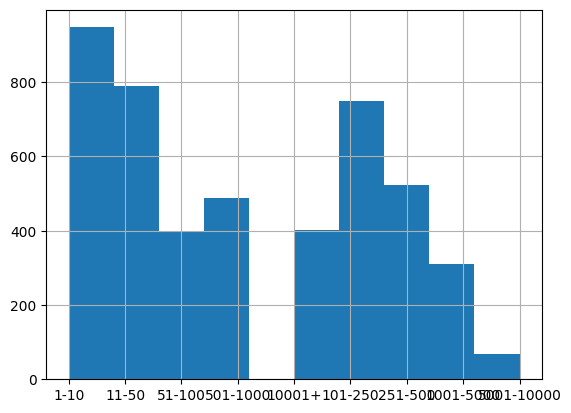

In [71]:
dataset["Number of Employees"].hist()
N_employees_dummies = pd.get_dummies(dataset["Number of Employees"], prefix="NumberEmployees_")
dataset = pd.concat([dataset, N_employees_dummies], axis=1)
dataset.head()

In [72]:
dataset['Last Funding Date'].isna().sum()

0

In [73]:
dataset['Last Funding Year'] = dataset['Last Funding Date'].str[:4].astype(int)


In [74]:
dataset = dataset[dataset["Last Funding Year"] > 1950]


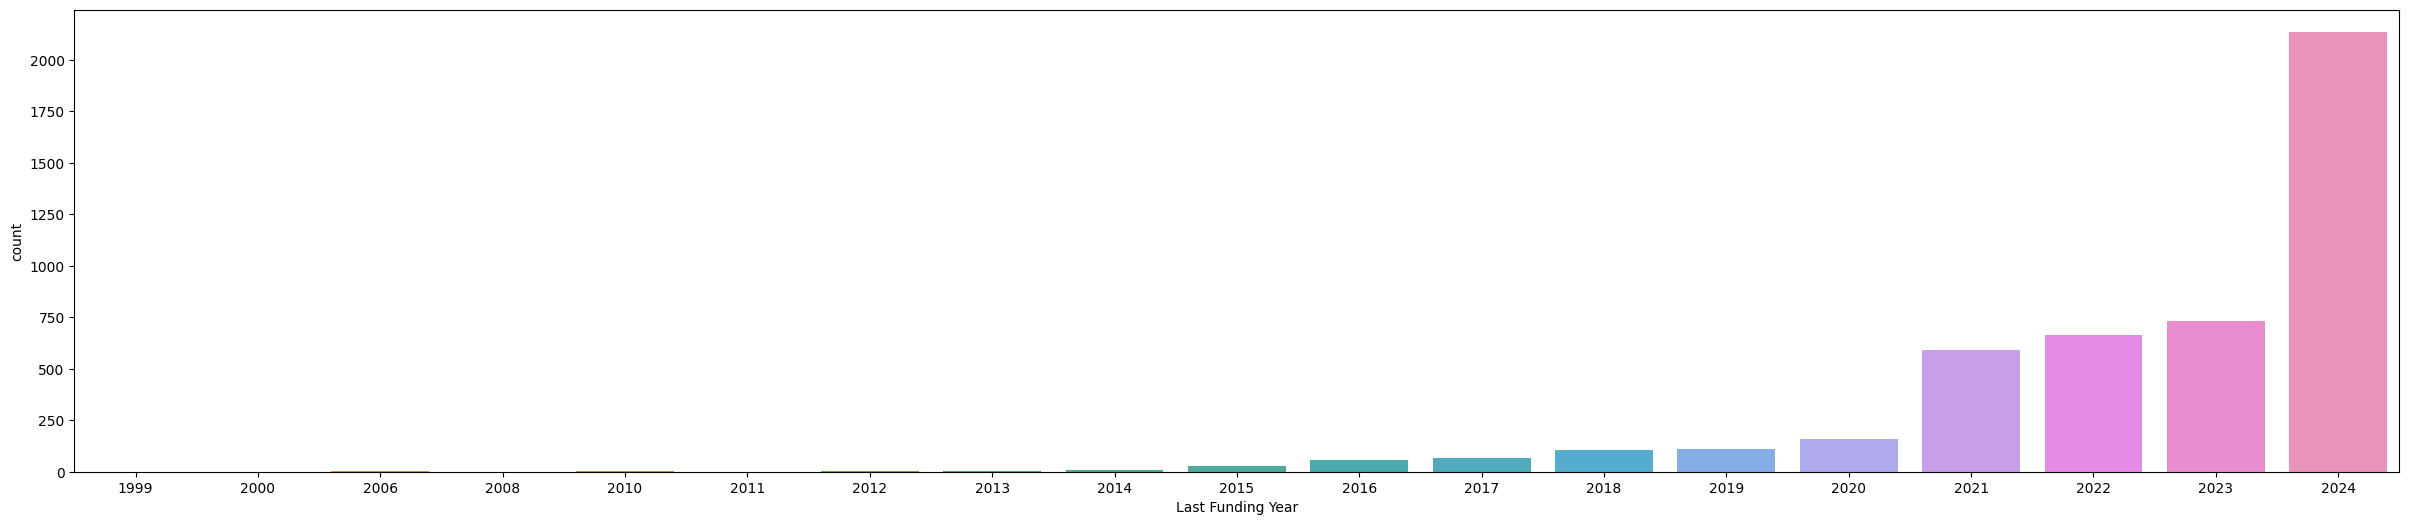

In [75]:
plt.figure(figsize=(30, 6))
sns.countplot(x="Last Funding Year", data=dataset)
plt.show()

In [76]:
dataset['Last Funding Type'].unique(), dataset['Last Funding Date'].describe()
Funding_type_dummies = pd.get_dummies(dataset["Last Funding Type"], prefix="FundingType_")
dataset = pd.concat([dataset, Funding_type_dummies], axis=1)

dataset.head()

,Organization Name,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Founded Date,Founded Date Precision,Operating Status,Number of Founders,...,FundingType__Series C,FundingType__Series D,FundingType__Series E,FundingType__Series F,FundingType__Series G,FundingType__Series H,FundingType__Series I,FundingType__Series J,FundingType__Undisclosed,FundingType__Venture - Series Unknown
0,The VERT,Private,For Profit,1-10,Pre-Seed,2024-09-01,2021-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,0
3,NovoGrid,Private,For Profit,1-10,Convertible Note,2019-12-31,2014-09-15,day,Active,3.0,...,0,0,0,0,0,0,0,0,0,0
5,Metaschool,Private,For Profit,11-50,Seed,2022-09-23,2022-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,0
7,Ignota Labs,Private,For Profit,1-10,Pre-Seed,2022-10-11,2021-01-01,year,Active,2.0,...,0,0,0,0,0,0,0,0,0,0
10,Coffee Circle,Private,For Profit,51-100,Series B,2023-06-26,2010-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,0


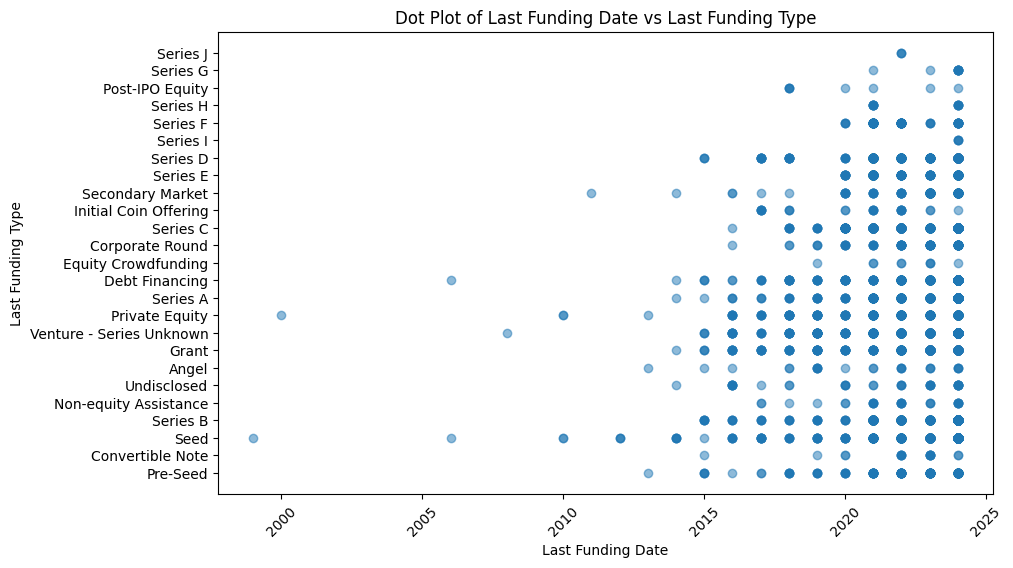

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Last Funding Year'], dataset['Last Funding Type'], alpha=0.5)
plt.title('Dot Plot of Last Funding Date vs Last Funding Type')
plt.xlabel('Last Funding Date')
plt.ylabel('Last Funding Type')
plt.xticks(rotation=45)
plt.show()

In [78]:
dataset.columns

Index(['Organization Name', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Founded Date', 'Founded Date Precision', 'Operating Status',
       'Number of Founders', 'Number of Funding Rounds',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount (in USD)',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors', 'Headquarters Regions',
       'Industry Groups', 'Industries', 'Headquarters Location',
       'Main Industry', 'Industry Name', 'Status__Private',
       'CompanyType__For Profit', 'CompanyType__Non-profit',
       'NumberEmployees__1-10', 'NumberEmployees__10001+',
       'NumberEmployees__1001-5000', 'NumberEmployees__101-250',
       'NumberEmployees__11-50', 'NumberEmployees__251-500',
       'NumberEmployees__5001-10000', 'NumberEmployees__501-1000',
       'NumberEmployees__51-100', 'Last Funding Year', 'FundingType__Angel'

# Industries
### The idea is to use Damodaran Codification for each of the industries and to create a map such that if the dataset will be extended in the future, it still will be possible to allocate.
- First step is then to get unique values of each firm
- Second step is to map and get criteria on allocation.

In [79]:
len(dataset["Industry Name"].unique())

56

In [80]:
industry_dummies = dataset["Industry Name"].str.get_dummies().add_prefix('Industry_')
dataset = pd.concat([dataset, industry_dummies], axis=1)
industries = dataset.columns[dataset.columns.str.startswith('Industry_')]

In [81]:
dataset.columns

Index(['Organization Name', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Founded Date', 'Founded Date Precision', 'Operating Status',
       'Number of Founders',
       ...
       'Industry_Restaurant/Dining', 'Industry_Retail (Automotive)',
       'Industry_Retail (General)', 'Industry_Software (Entertainment)',
       'Industry_Software (Internet)',
       'Industry_Software (System & Application)',
       'Industry_Telecom. Equipment', 'Industry_Telecom. Services',
       'Industry_Transportation', 'Industry_Transportation (Railroads)'],
      dtype='object', length=117)

In [82]:
unique_headquarters = dataset["Headquarters Regions"].unique()
unique_headquarters_df = pd.DataFrame(unique_headquarters, columns=["Headquarters Location"])
unique_headquarters_df.head()

,Headquarters Location
0,"Europe, Middle East, and Africa (EMEA)"
1,"European Union (EU), Europe, Middle East, and ..."
2,"Asia-Pacific (APAC), Association of Southeast ..."
3,Asia-Pacific (APAC)
4,Latin America


In [83]:

data = {
    'Headquarters Location': [
        'San Francisco Bay Area, Silicon Valley, West Coast',
        'Greater Boston Area, East Coast, New England',
        'San Francisco Bay Area, West Coast, Western US',
        'Greater New York Area, East Coast, Northeastern US',
        'Asia-Pacific (APAC), Southeast Asia',
        'Greater Seattle Area, West Coast, Western US',
        'Europe, Middle East, and Africa (EMEA)',
        'Greater Denver Area, Western US',
        'Asia-Pacific (APAC)',
        'Greater Los Angeles Area, West Coast, Western US',
        'Southern US',
        'Greater Atlanta Area, East Coast, Southern US',
        'Greater Chicago Area, Great Lakes, Midwestern US',
        'Europe, Middle East, and Africa (EMEA), Middle East, MENA',
        'European Union (EU), Europe, Middle East, and Africa (EMEA)',
        'Research Triangle, East Coast, Southern US',
        'Greater Phoenix Area, Western US',
        'Washington DC Metro Area, East Coast, Southern US',
        'Great Lakes',
        'Greater Baltimore-Maryland Area, East Coast, Southern US',
        'Asia-Pacific (APAC), Western US',
        'Great Lakes, Northeastern US',
        'Europe, Middle East, and Africa (EMEA), GCC, Middle East',
        'European Union (EU), Nordic Countries, Scandinavia',
        'Tampa Bay Area, East Coast, Southern US',
        'Great Lakes, Midwestern US',
        'East Coast, Southern US',
        'Washington DC Metro Area, Southern US',
        'Latin America',
        'Western US',
        'Greater San Diego Area, West Coast, Western US',
        'Greater Detroit Area, Great Lakes, Midwestern US',
        'Greater Philadelphia Area, East Coast, Southern US',
        'West Coast, Western US',
        'Great Lakes, East Coast, Northeastern US',
        'Greater Miami Area, East Coast, Southern US',
        'Greater Philadelphia Area, Great Lakes, Northeastern US',
        'Dallas/Fort Worth Metroplex, Southern US',
        'Midwestern US',
        'Europe, Middle East, and Africa (EMEA), European Union (EU), Middle East',
        'East Coast, New England, Northeastern US',
        'Greater Houston Area, Southern US',
        'Asia-Pacific (APAC), Australasia',
        'Nordic Countries, Scandinavia, Europe, Middle East, and Africa (EMEA)',
        'Asia-Pacific (APAC), Middle East and North Africa (MENA)',
        'East Coast, Northeastern US',
        'Greater Minneapolis-Saint Paul Area, Great Lakes, Midwestern US',
        'New England, Northeastern US',
        'Middle East and North Africa (MENA)',
        'Central America, Latin America',
        'Greater Los Angeles Area, Inland Empire, West Coast',
        'Greater Philadelphia Area, East Coast, Northeastern US',
        'European Union (EU), Middle East and North Africa (MENA), EMEA',
        'Middle East and North Africa (MENA), North Africa, EMEA'
    ]
}

dataset1 = pd.DataFrame(data)

# Define a function to map regions to macro-regions
def map_to_macro_region(region):
    # North America
    if any(x in region for x in ['West Coast', 'Western US', 'East Coast', 'Great Lakes', 'Midwestern US', 'Southern US', 'Northeastern US']):
        return 'North America'
    
    # Asia-Pacific (APAC)
    elif any(x in region for x in ['Asia-Pacific', 'APAC', 'Southeast Asia', 'Australasia']):
        return 'Asia-Pacific'
    
    # Europe, Middle East, and Africa (EMEA)
    elif any(x in region for x in ['Europe', 'Middle East', 'Africa', 'EMEA', 'European Union', 'EU', 'Scandinavia', 'Nordic', 'GCC', 'MENA', 'North Africa']):
        return 'EMEA'
    
    # Latin America
    elif any(x in region for x in ['Latin America', 'Central America']):
        return 'Latin America'
    
    # Default to 'Other' if no matches found
    else:
        return 'Other'

# Apply the mapping function
dataset['Macro Region'] = dataset['Headquarters Regions'].apply(map_to_macro_region)

dataset


,Organization Name,IPO Status,Company Type,Number of Employees,Last Funding Type,Last Funding Date,Founded Date,Founded Date Precision,Operating Status,Number of Founders,...,Industry_Retail (Automotive),Industry_Retail (General),Industry_Software (Entertainment),Industry_Software (Internet),Industry_Software (System & Application),Industry_Telecom. Equipment,Industry_Telecom. Services,Industry_Transportation,Industry_Transportation (Railroads),Macro Region
0,The VERT,Private,For Profit,1-10,Pre-Seed,2024-09-01,2021-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,EMEA
3,NovoGrid,Private,For Profit,1-10,Convertible Note,2019-12-31,2014-09-15,day,Active,3.0,...,0,0,0,0,0,0,0,0,0,EMEA
5,Metaschool,Private,For Profit,11-50,Seed,2022-09-23,2022-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,Asia-Pacific
7,Ignota Labs,Private,For Profit,1-10,Pre-Seed,2022-10-11,2021-01-01,year,Active,2.0,...,0,0,0,0,1,0,0,0,0,EMEA
10,Coffee Circle,Private,For Profit,51-100,Series B,2023-06-26,2010-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,EMEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,SK Innovation,Private,For Profit,10001+,Venture - Series Unknown,2020-10-01,1962-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,Asia-Pacific
9947,Shangqiao Logistics,Private,For Profit,10001+,Series A,2019-11-18,2016-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,1,0,Asia-Pacific
9954,wowworks,Private,For Profit,10001+,Seed,2021-03-01,2014-01-01,year,Active,2.0,...,0,0,0,0,0,0,0,0,0,EMEA
9970,Boolv.com,Private,For Profit,10001+,Seed,2019-06-14,2016-01-01,year,Active,1.0,...,0,0,0,0,0,0,0,0,0,Asia-Pacific


In [84]:
dataset["Macro Region"].unique()

array(['EMEA', 'Asia-Pacific', 'Latin America', 'North America'],
      dtype=object)

In [85]:
macro_region_dummies = pd.get_dummies(dataset["Macro Region"], prefix="Region")
dataset = pd.concat([dataset, macro_region_dummies], axis=1)


In [86]:
dataset.columns

Index(['Organization Name', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Founded Date', 'Founded Date Precision', 'Operating Status',
       'Number of Founders',
       ...
       'Industry_Software (System & Application)',
       'Industry_Telecom. Equipment', 'Industry_Telecom. Services',
       'Industry_Transportation', 'Industry_Transportation (Railroads)',
       'Macro Region', 'Region_Asia-Pacific', 'Region_EMEA',
       'Region_Latin America', 'Region_North America'],
      dtype='object', length=122)

In [87]:
unique_headquarters = dataset["Macro Region"].unique()
unique_headquarters_df = pd.DataFrame(unique_headquarters, columns=["Headquarters Regions"])
unique_headquarters_df


,Headquarters Regions
0,EMEA
1,Asia-Pacific
2,Latin America
3,North America


In [88]:
# create dummies for headquarters location but consider two layers of dummies: 
# the first you should consider the country and the second the region, such that: if "Palo Alto, California, United States" 
# then create a dummy for country "country_United States" and a dummy for region "region_California"
#headquarters_dummies.columns = ["City", "Region", "Country"]
#headquarters_dummies = pd.get_dummies(headquarters_dummies, prefix=["City_", "Region_", "Country_"])
#dataset = pd.concat([dataset, headquarters_dummies], axis=1)


NameError: name 'headquarters_dummies' is not defined

In [268]:
location = [col for col in dataset.columns if col.startswith("Region_")]
location

['Region_Asia-Pacific',
 'Region_EMEA',
 'Region_Latin America',
 'Region_North America']

In [198]:
#dataset['CB Rank (Company)'] = dataset['CB Rank (Company)'].str.replace(',', '')
#dataset['CB Rank (Company)'] = dataset['CB Rank (Company)'].astype(int)

In [199]:

#min_value = dataset['CB Rank (Company)'].min().round(1)
#max_value = dataset['CB Rank (Company)'].max().round(1)
#mean_value = dataset['CB Rank (Company)'].mean().round(1)
#median_value = dataset['CB Rank (Company)'].median().round(1)

# Create a DataFrame to store the statistics
#stats_df = pd.DataFrame({
#    'Statistic': ['Min', 'Max', 'Mean', 'Median'],
#    'Value': [min_value, max_value, mean_value, median_value]
#})
#stats_df


- Extremely High: This category should include the top 0.1% of values., Threshold: Rank values between 5.0 and approximately 100.
- High: This category should include the next 1% of values. Threshold: Rank values between 101 and approximately 1,000.
- Medium-High: This category includes the next 10% of values. Threshold: Rank values between 1,001 and approximately 10,000.
- Medium: This is the middle category and could include the next 30% of values. Threshold: Rank values between 10,001 and approximately 50,000.
- Medium-Low: This category includes the next 30% of values. Threshold: Rank values between 50,001 and approximately 300,000.
- Low: This category includes the next 20% of values. Threshold: Rank values between 300,001 and approximately 1,000,000.
- Extremely Low: This category includes the bottom 8.9% of values. Threshold: Rank values between 1,000,001 and 3,463,417.


cb_rank = dataset['CB Rank (Company)']

def classify_cb_rank(rank):
    if rank <= 100:
        return 'Extremely High'
    elif rank <= 1000:
        return 'High'
    elif rank <= 10000:
        return 'Medium-High'
    elif rank <= 50000:
        return 'Medium'
    elif rank <= 300000:
        return 'Medium-Low'
    elif rank <= 1000000:
        return 'Low'
    else:
        return 'Extremely Low'

dataset['CB Rank Class'] = cb_rank.apply(classify_cb_rank)

cb_rank_dummies = pd.get_dummies(dataset['CB Rank Class'], prefix='CB Rank')

dataset = pd.concat([dataset, cb_rank_dummies], axis=1)

dataset.drop('CB Rank Class', axis=1, inplace=True)
dataset.head(3)

ranking = [col for col in dataset.columns if col.startswith("CB Rank")]

# Dealing with financial variables
- Investment Stage,
- Number of Founders,
- Number of Funding Rounds,
- Funding Status, 
- Last Equity Funding Type
- Last Funding Amount, -> KEEP -> Last Funding Amount (in USD)'
- Last Funding Amount Currency,
- Last Equity Funding Amount',
- Last Equity Funding Amount Currency',
- Last Equity Funding Amount (in USD)', 'Last Equity Funding Type,
- Total Equity Funding Amount', 'Total Equity Funding Amount Currency,
- Total Equity Funding Amount (in USD)', 'Total Funding Amount,
- Total Funding Amount Currency', -> KEEP -> Total Funding Amount (in USD)

In [201]:
dataset.columns

Index(['Organization Name', 'IPO Status', 'Company Type',
       'Number of Employees', 'Last Funding Type', 'Last Funding Date',
       'Founded Date', 'Operating Status', 'Number of Founders',
       'Number of Funding Rounds', 'Last Funding Amount (in USD)',
       'Last Equity Funding Amount (in USD)',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors', 'Headquarters Regions',
       'Industry Groups', 'Status__Private', 'CompanyType__For Profit',
       'CompanyType__Non-profit', 'NumberEmployees__1-10',
       'NumberEmployees__10001+', 'NumberEmployees__1001-5000',
       'NumberEmployees__101-250', 'NumberEmployees__11-50',
       'NumberEmployees__251-500', 'NumberEmployees__5001-10000',
       'NumberEmployees__501-1000', 'NumberEmployees__51-100',
       'Last Funding Year', 'FundingType__Angel',
       'FundingType__Convertible Note', 'FundingType__Corporate Round',
       'FundingType__Debt Financ

In [202]:
#dataset["Funding Status"].unique()
#funding_status_dummies = pd.get_dummies(dataset["Funding Status"], prefix="FundingStatus_")
#dataset = pd.concat([dataset, funding_status_dummies], axis=1)


In [269]:
dataset["Last Funding Type"].unique()
last_equity_funding_type_dummies = pd.get_dummies(dataset["Last Funding Type"], prefix="LastFundingType_")
dataset = pd.concat([dataset, last_equity_funding_type_dummies], axis=1)


In [270]:
founding = [
    "Number of Founders",
    "Number of Funding Rounds",
    *[col for col in dataset.columns if col.startswith("FundingStatus_")],
    *[col for col in dataset.columns if col.startswith("LastEquityFundingType_")],
    "Total Funding Amount (in USD)",
    "Total Equity Funding Amount (in USD)",
    "Last Funding Amount (in USD)"
]

# Print the shape of the DataFrame columns
print(dataset[founding].shape)

(7644, 5)


In [271]:
dataset["Last Funding Amount (in USD)"].describe()

count    7.644000e+03
mean     5.613593e+07
std      2.893290e+08
min      0.000000e+00
25%      3.500000e+05
50%      6.000000e+06
75%      3.300000e+07
max      1.500000e+10
Name: Last Funding Amount (in USD), dtype: float64

In [272]:
dataset["Top 5 Investors"].unique()

array(['BlackRock, Neuberger Berman, Alumni Ventures, GCM Grosvenor, Tiger Global Management',
       'Scott Barber',
       'Microsoft, Khosla Ventures, Andreessen Horowitz, Thrive Capital, Sequoia Capital',
       ...,
       'Neuberger Berman, Kaszek, General Atlantic, Moore Strategic Ventures, Valor Capital Group',
       'FMO, British International Investment',
       'Techstars, FJ Labs, NUMA, WiL (World Innovation Lab), Shopify'],
      dtype=object)

In [273]:
investors_dummies = pd.get_dummies(dataset["Top 5 Investors"].str.split(', ', expand=False).str.join('|').str.get_dummies())
investors_dummies = investors_dummies.add_prefix('Investor_')
investors_dummies

,Investor_ Angel Investment Fund,Investor_ CGC,Investor_ Group,Investor_ High-Tech Gruenderfonds,Investor_ Twelve,Investor_ Zero Waste Foundation,Investor_#Angels,Investor_(ERA) Entrepreneurs Roundtable Accelerator,Investor_+ND Capital,Investor_.406 Ventures,...,Investor_xEdu,Investor_xMillion Capital,Investor_xto10x Technologies,Investor_yet2.com,Investor_yet2Ventures,Investor_zVentures,Investor_Åsa Lidén,Investor_Ørsted,Investor_Ørsted Propel acceleration programme,Investor_İzzet Halyo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
dataset = pd.concat([dataset, investors_dummies], axis=1)

In [211]:
investors = [col for col in dataset.columns if col.startswith("Investor_")]

In [274]:
dataset.to_csv(r"/workspaces/Startups_multiples/analysis/dataset_without_damodarandata.csv", index=False)

In [215]:
damodaran = pd.read_excel(r"/workspaces/Startups_multiples/damodaran_files/damo2.xlsx")

In [217]:
analysis = pd.merge(dataset, damodaran, on="Industry Name", how="left")

In [ ]:
analysis.to_excel(r"/workspaces/Startups_multiples/analysis/analysis_data.xlsx", index=False)